In [1]:
import numpy as np
from init import readFile, split_dataset, KNearestNeighbours, error

In [2]:
CLASSES = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
FEATURES = ['sepal length (in cm)', 'sepal width (in cm)', 'petal length (in cm)', 'petal width (in cm)']

In [3]:
data, output = readFile('IA3-ml_data_iris.txt', CLASSES)

In [4]:
x_train, y_train, x_test, y_test = split_dataset(data, output)

In [5]:
knn = KNearestNeighbours.fit(x_train, y_train, 5)

In [6]:
x_test_predict = knn.predict(x_test)

In [7]:
from sklearn.metrics import confusion_matrix

cf_mat = confusion_matrix(y_test, np.array(list(map(int, x_test_predict))))

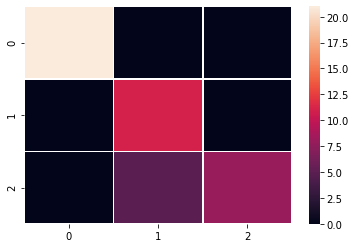

In [8]:
import seaborn as sns
import matplotlib.pylab as plt

ax = sns.heatmap(cf_mat, linewidth=0.5)
plt.show()

In [9]:
errors = []
k_values = np.arange(1, 20, 1, int)
for k in k_values:
    knn = KNearestNeighbours.fit(x_train, y_train, k)
    y_pred = knn.predict(x_test)
    # y_pred = np.array(list(map(int, y_pred)))
    errors.append(error(y_test, y_pred))

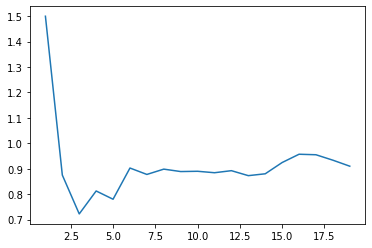

In [10]:
plt.plot(k_values, errors)